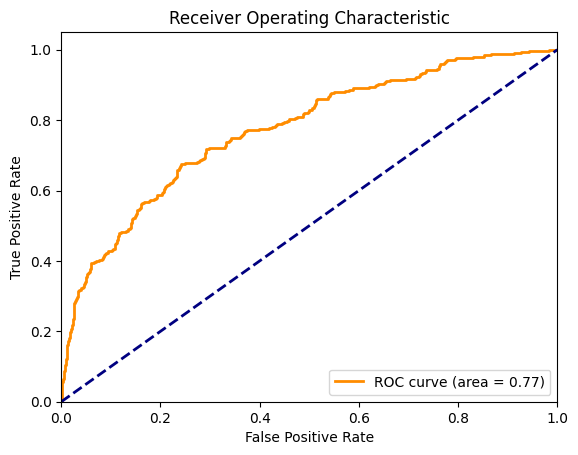

         ppv
1   0.833333
5   0.687151
10  0.588235
15  0.481343
20  0.422969


In [ ]:
# load paper results 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sheets = ["sc_all, sc_genprot", "sc_genprot_no", "ec_genprot", "ec_genprot_no"]


data = pd.read_excel('assets/paper_results.xls', sheet_name='ec_genprot')

grand_truth = data[data.columns[1]]
prediction = data[data.columns[2]]

# cal ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(grand_truth, prediction)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate ppv for 1%, 5%, 10%, 20%
ppv = []
for i in [0.01, 0.05, 0.1,0.15, 0.2]:
    threshold = np.percentile(prediction, 100-i*100)
    tp = np.sum((prediction > threshold) & (grand_truth == 1))
    fp = np.sum((prediction > threshold) & (grand_truth == 0))
    ppv.append(tp/(tp+fp))
ppv = pd.DataFrame(ppv, index=[1, 5, 10, 15, 20], columns=['ppv'])
print(ppv)


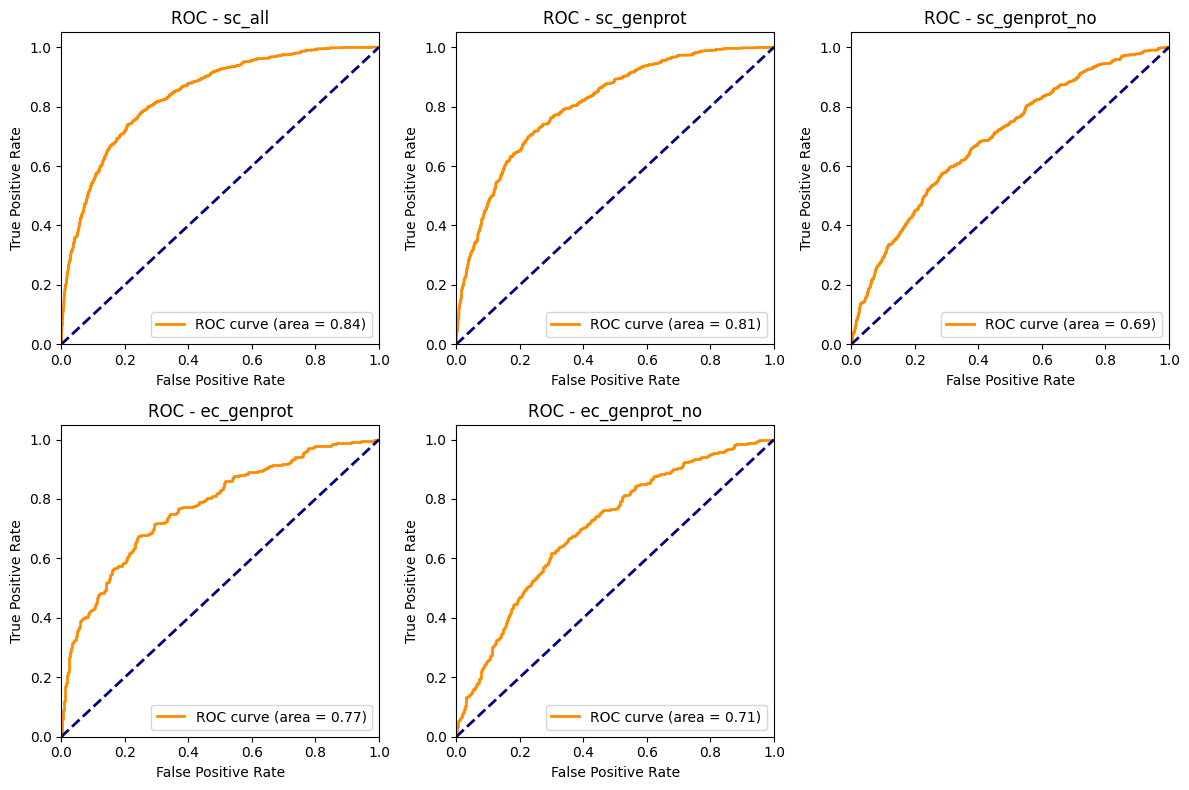

PPV per sc_all:
         ppv
1   0.895833
5   0.793249
10  0.691332
15  0.622535
20  0.576110
PPV per sc_genprot:
         ppv
1   0.833333
5   0.734177
10  0.625793
15  0.571831
20  0.524313
PPV per sc_genprot_no:
         ppv
1   0.625000
5   0.544304
10  0.452431
15  0.423944
20  0.384778
PPV per ec_genprot:
         ppv
1   0.833333
5   0.687151
10  0.588235
15  0.481343
20  0.422969
PPV per ec_genprot_no:
         ppv
1   0.638889
5   0.458101
10  0.358543
15  0.348881
20  0.334734


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Lista dei fogli da processare
sheets = ["sc_all", "sc_genprot", "sc_genprot_no", "ec_genprot", "ec_genprot_no"]

# Percorso del file Excel
file_path = 'assets/paper_results.xls'

# Calcola il numero di righe e colonne per la griglia dei grafici
num_sheets = len(sheets)
ncols = 3  # Numero di colonne per affiancare i grafici
nrows = (num_sheets + ncols - 1) // ncols  # Calcola il numero di righe necessarie

# Imposta la dimensione della figura (più piccola)
plt.figure(figsize=(12, 4 * nrows))

# Itera attraverso ogni foglio e calcola i risultati
for i, sheet in enumerate(sheets):
    # Carica i dati dal foglio corrente
    data = pd.read_excel(file_path, sheet_name=sheet)
    grand_truth = data[data.columns[1]]
    prediction = data[data.columns[2]]
    
    # Calcola la curva ROC
    fpr, tpr, thresholds = roc_curve(grand_truth, prediction)
    roc_auc = auc(fpr, tpr)
    
    # Aggiungi un grafico alla griglia
    plt.subplot(nrows, ncols, i + 1)
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC - {sheet}')
    plt.legend(loc="lower right")

# Mostra i grafici
plt.tight_layout()
plt.show()

# Calcolare PPV per 1%, 5%, 10%, 15%, 20% per ogni foglio
for sheet in sheets:
    # Carica i dati dal foglio corrente
    data = pd.read_excel(file_path, sheet_name=sheet)
    grand_truth = data[data.columns[1]]
    prediction = data[data.columns[2]]
    
    ppv = []
    for i in [0.01, 0.05, 0.1, 0.15, 0.2]:
        threshold = np.percentile(prediction, 100-i*100)
        tp = np.sum((prediction > threshold) & (grand_truth == 1))
        fp = np.sum((prediction > threshold) & (grand_truth == 0))
        ppv.append(tp/(tp+fp))
    
    ppv_df = pd.DataFrame(ppv, index=[1, 5, 10, 15, 20], columns=['ppv'])
    
    # Mostra la tabella PPV in modo chiaro
    print(f'PPV per {sheet}:')
    print(ppv_df.to_string())  # Stampa la tabella senza abbreviazioni
